In [392]:
# Import necessary libraries

In [391]:
import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D
import tensorflow as tf
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [393]:
# Load path to data with phone numbers

In [17]:
data_dir = Path('Phone numbers')
imgs = list(data_dir.glob('*.png'))

In [394]:
# Let's look at one

In [18]:
def image(i):
    return Image.open(imgs[i])

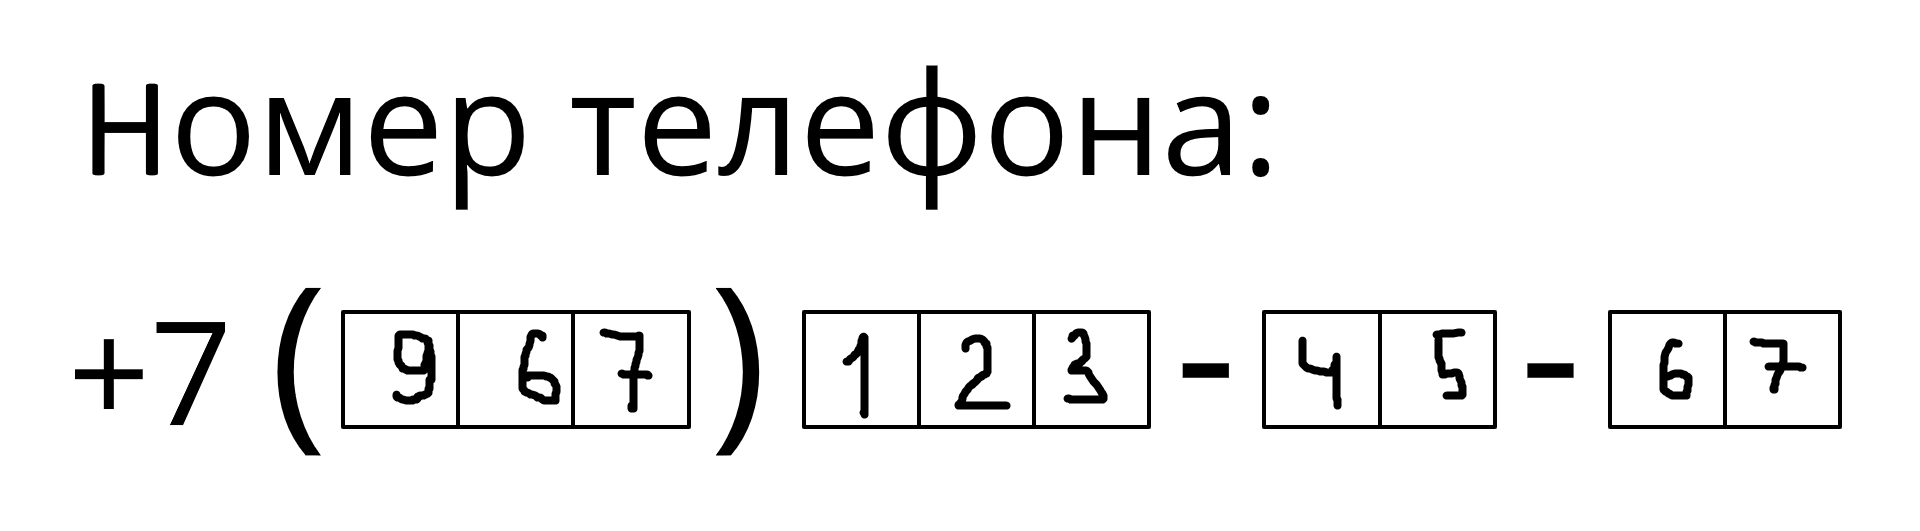

In [19]:
image_1 = image(0)
image_1

In [396]:
# Get the digits out from the phone number

In [20]:
def digit_picker(img):
    img_to_array = np.array(img, dtype=np.uint8)
    xs = 345 # Cell start coordinate x
    ys = 315 # Cell start coordinate y
    l = 110 # Cell length
    h = 110 # Cell height
    dc = [] # Digits coordinates
    for i in range(13):
        dc.append([ys,ys+l,2+(xs+5*i)+i*h,1+(xs+h+5*i)+i*h])
    digits = []
    for c in dc:
        digits.append(img_to_array[c[0]:c[1],c[2]:c[3]]) # Digits with bracket and dashes
    # Drop bracket and dashes
    del digits[3]
    del digits[7-1]
    del digits[10-2]
    return np.stack(digits, axis=0)

In [395]:
# Let's look at the digits

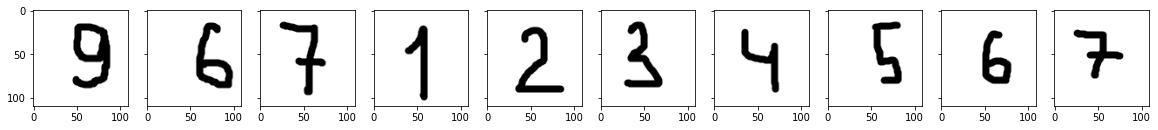

In [21]:
fig, axs = plt.subplots(1,10, sharex=True, sharey=True, figsize=(20,20))
for i in range(10):
    axs[i].imshow(digit_picker(image_1)[i])

In [398]:
# Resize digit to 28x28 and convert it to grayscale.

In [22]:
def digits_resizer(digit):
    resized = Image.fromarray(digit).resize((28, 28))
    mean_axis_2 = np.mean(resized, axis=2)
    inverted = 1-np.array(mean_axis_2).astype(np.float32)/255.
    reshaped = np.reshape(inverted, (28, 28, 1))
    return reshaped

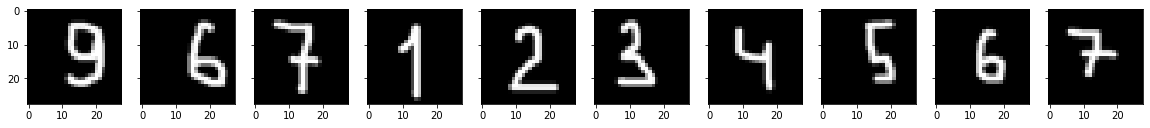

In [24]:
fig, axs = plt.subplots(1,10, sharex=True, sharey=True, figsize=(20,20))
for i in range(10):
    axs[i].imshow(digits_resizer(digit_picker(image_1)[i])[:,:,0], cmap=plt.cm.gray)

In [399]:
# Load mnist datasets to train our CNN

In [400]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [401]:
# Convert it

In [402]:
train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

In [409]:
# Let's look at the shapes. Yes! they are equal

In [410]:
train_x[0].shape

(28, 28, 1)

In [411]:
digits_resizer(digit_picker(image_1)[0]).shape

(28, 28, 1)

In [413]:
# Creating CNN

In [417]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape = train_x[0].shape),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [418]:
# Structure of CNN

In [419]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)         

In [420]:
model.compile(optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [421]:
# Fit the model

In [424]:
NUM_EPOCHS = 20
model.fit(train_x, train_y, epochs=NUM_EPOCHS, validation_data=(test_x, test_y))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3353 - accuracy: 0.5269 - val_loss: 0.1209 - val_accuracy: 0.9653
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1233 - accuracy: 0.9610 - val_loss: 0.0719 - val_accuracy: 0.9782
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0537 - val_accuracy: 0.9834
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0633 - accuracy: 0.9805 - val_loss: 0.0499 - val_accuracy: 0.9852
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - accuracy: 0.9847 - val_loss: 0.0471 - val_accuracy: 0.9858
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0417 - val_accuracy: 0.9870
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0339 - val_accuracy:

In [429]:
# Evaluating the model

In [430]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.9914


[0.02583945356309414, 0.9914000034332275]

In [431]:
# Let's create predictor of phone number

In [465]:
def predictor(img, model):
    batch = []
    for dgt in digit_picker(img):
        batch.append(digits_resizer(dgt))
    batch = np.stack(batch, axis=0)
    pred = np.argmax(model.predict_on_batch(batch), axis = 1)
    print('Recognized phone number: +7 ({}{}{}) {}{}{}-{}{}-{}{}'.format(pred[0],
                                                                      pred[1],
                                                                      pred[2],
                                                                      pred[3],
                                                                      pred[4],
                                                                      pred[5],
                                                                      pred[6],
                                                                      pred[7],
                                                                      pred[8],
                                                                      pred[9]))
    return img

In [466]:
# Unfortunately, our model cannot determine even the simplest phone number.

Recognized phone number: +7 (471) 635-27-11


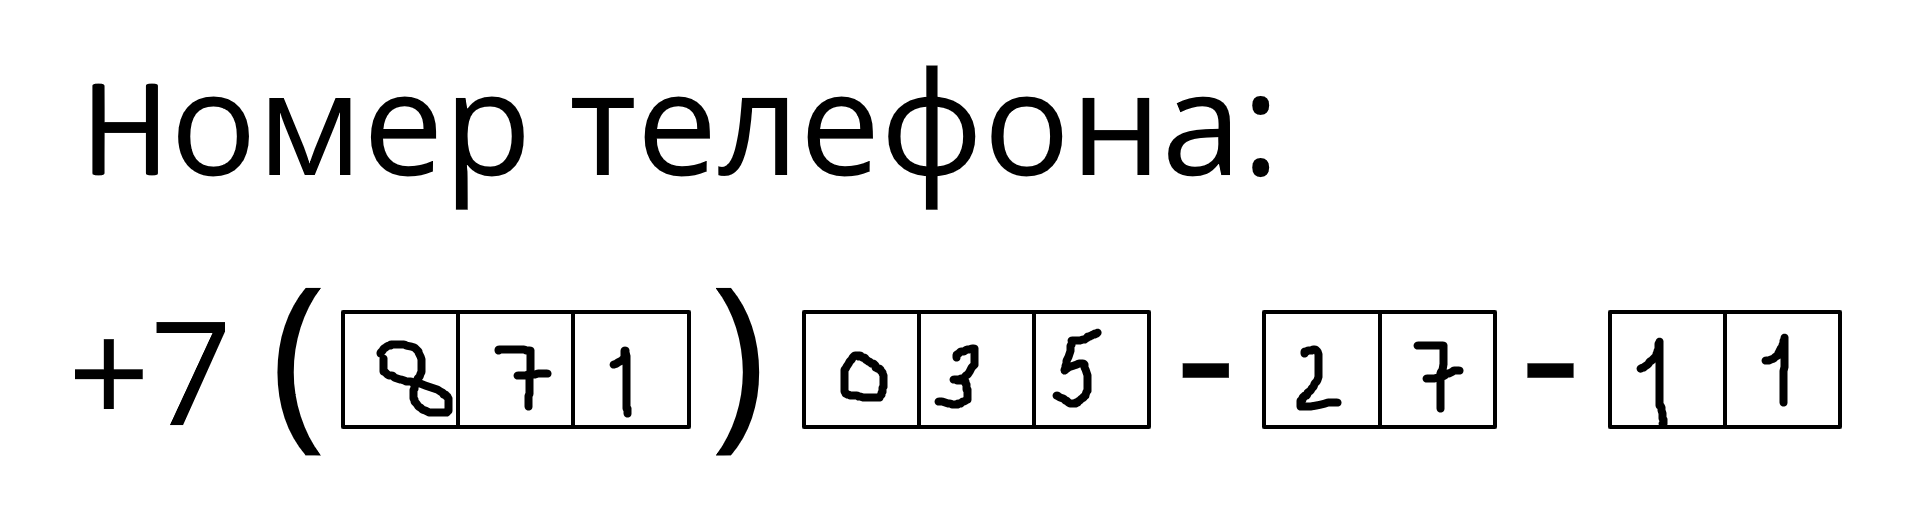

In [467]:
predictor(image(4), model)

In [435]:
# Is there something wrong with the phone number? Let's see another

Recognized phone number: +7 (817) 123-45-63


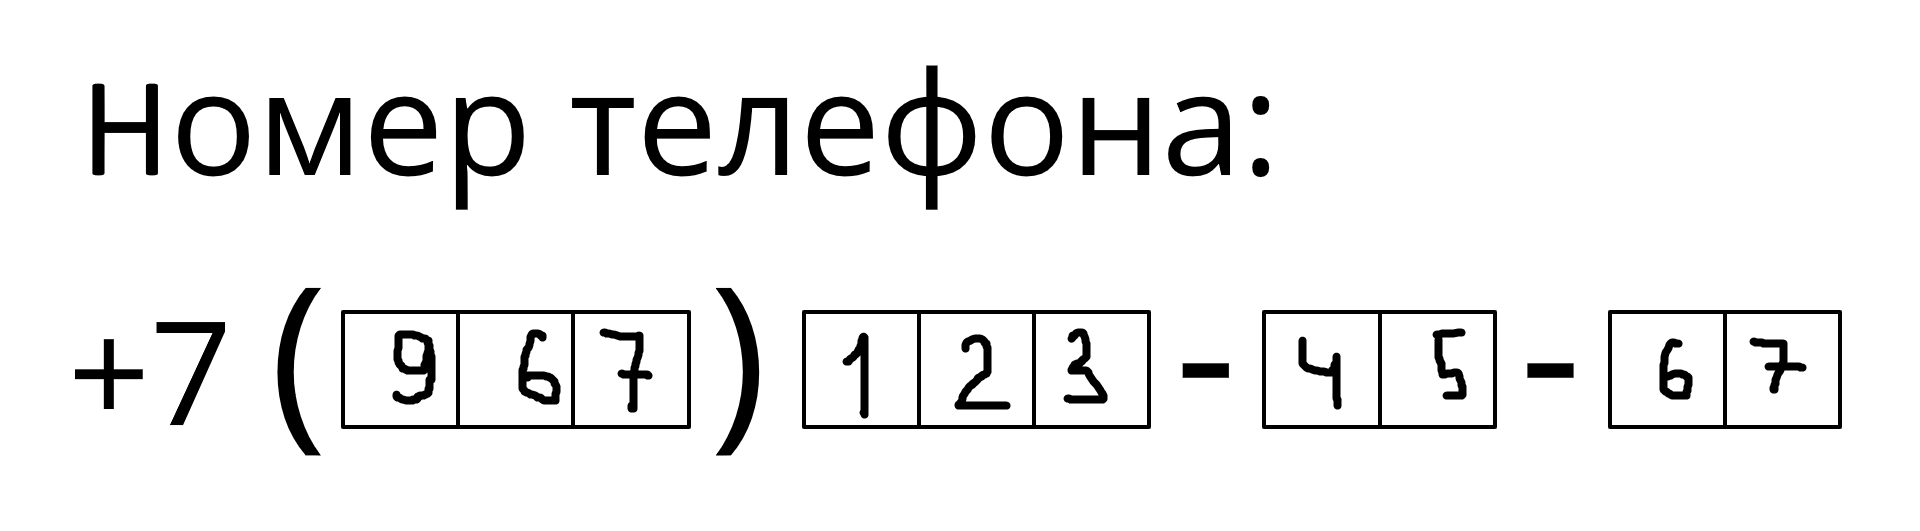

In [468]:
predictor(image(0), model)

In [445]:
# What to do? Let's use augmentation

In [447]:
# Creating generator

In [600]:
datagen = ImageDataGenerator(zoom_range=0.2, rotation_range=35 ,width_shift_range=0.3, height_shift_range=0.3)

In [601]:
# Fitting generator

In [602]:
datagen.fit(train_x)
data_augment = datagen.flow(train_x, train_y, batch_size=train_x.shape[0])[0]

In [603]:
# Now we have augmented data with rotations, zooms, shifts

In [604]:
train_x_aug = np.array(data_augment[0])
train_y_aug = np.array(data_augment[1])

In [605]:
# Concatenate augmented data to original train data

In [606]:
train_new_x = np.concatenate((train_x,train_x_aug), axis = 0)
train_new_y = np.concatenate((train_y,train_y_aug), axis = 0)

In [565]:
# Let's look at the shapes

In [607]:
train_new_y.shape

(120000,)

In [608]:
train_new_x.shape

(120000, 28, 28, 1)

In [609]:
# Creating new CNN model

In [610]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape = train_x[0].shape),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [611]:
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
dropout_15 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 2, 2, 64)        

In [612]:
model_2.compile(optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [613]:
# Fit the new model on new concatenated data

In [614]:
NUM_EPOCHS = 20
model_2.fit(train_new_x, train_new_y, epochs=NUM_EPOCHS, validation_data=(test_x, test_y))

Epoch 1/20
3750/3750 [==============================] - 11s 3ms/step - loss: 1.5247 - accuracy: 0.4871 - val_loss: 0.1437 - val_accuracy: 0.9580
Epoch 2/20
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4975 - accuracy: 0.8376 - val_loss: 0.0789 - val_accuracy: 0.9746
Epoch 3/20
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3513 - accuracy: 0.8860 - val_loss: 0.0525 - val_accuracy: 0.9849
Epoch 4/20
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2742 - accuracy: 0.9114 - val_loss: 0.0419 - val_accuracy: 0.9873
Epoch 5/20
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2314 - accuracy: 0.9250 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 6/20
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2015 - accuracy: 0.9350 - val_loss: 0.0353 - val_accuracy: 0.9887
Epoch 7/20
3750/3750 [==============================] - 11s 3ms/step - loss: 0.1775 - accuracy: 0.9430 - val_loss: 0.0333 - val_ac

In [615]:
# Evaluating the model

In [616]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9930


[0.025599757209420204, 0.9929999709129333]

In [617]:
# Okey, let's check model 

In [618]:
# Check simplest phone numbers

Recognized phone number: +7 (871) 035-27-11


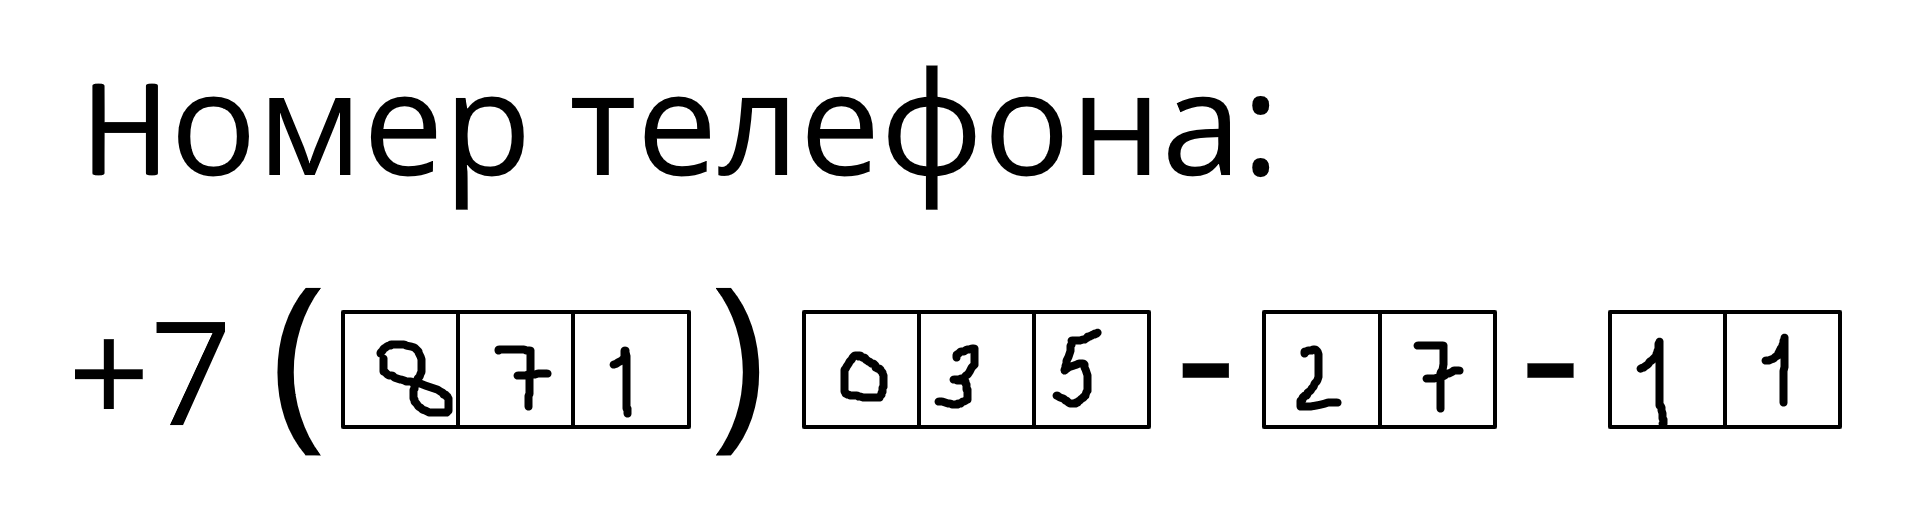

In [630]:
predictor(image(4), model_2)

Recognized phone number: +7 (967) 123-45-67


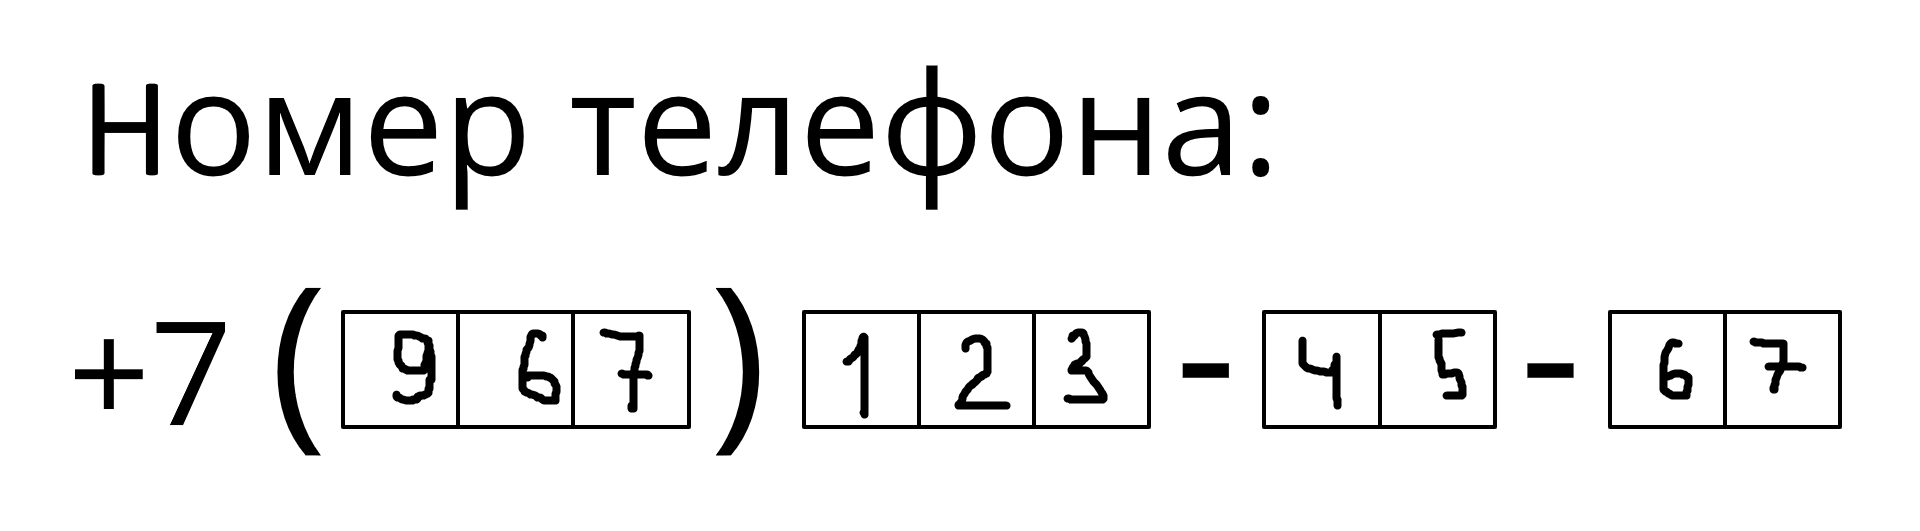

In [620]:
predictor(image(0), model_2)

Recognized phone number: +7 (445) 566-77-88


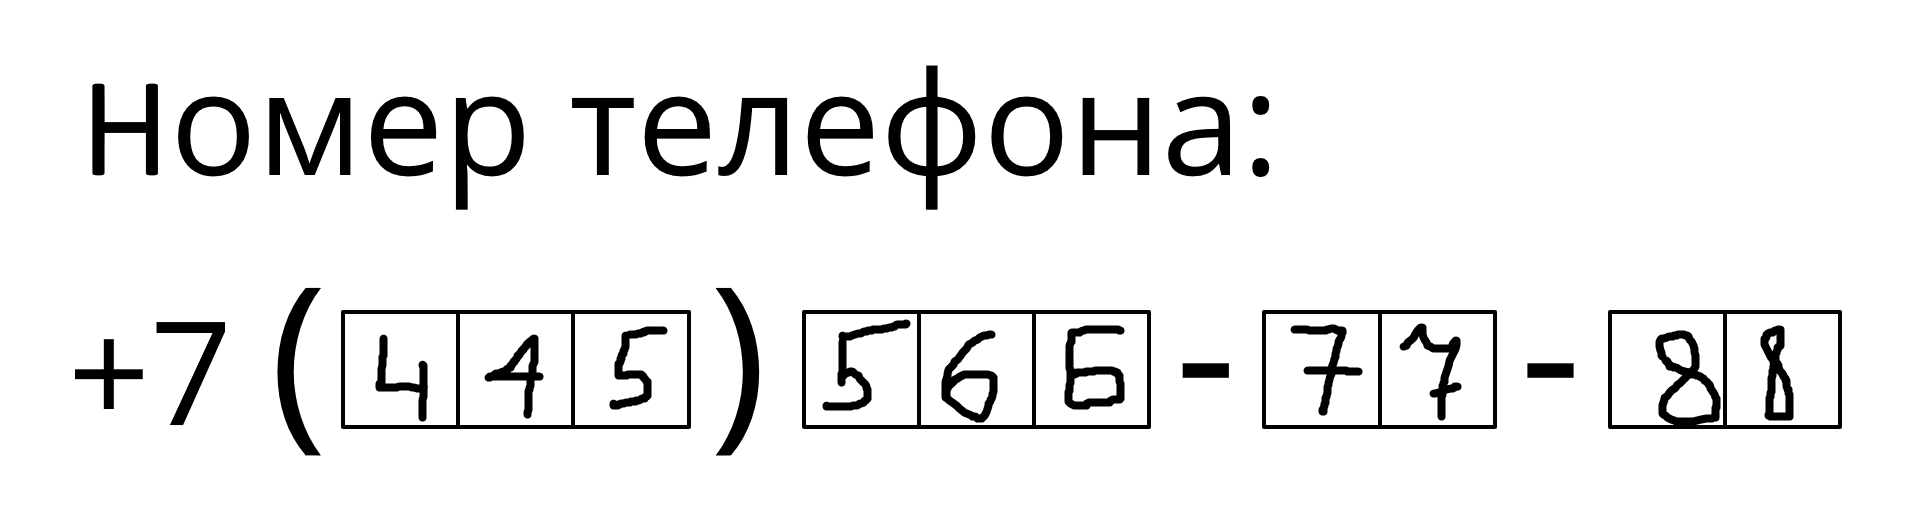

In [621]:
predictor(image(2), model_2)

In [488]:
# Hurrah! what about harder phone numbers?

In [625]:
# As we can see small size digits are difficult for our model

In [629]:
# To solve this problem we should add more small size digits to train data or 
# vary zoom_range in ImageDataGeneraitor

Recognized phone number: +7 (703) 123-55-73


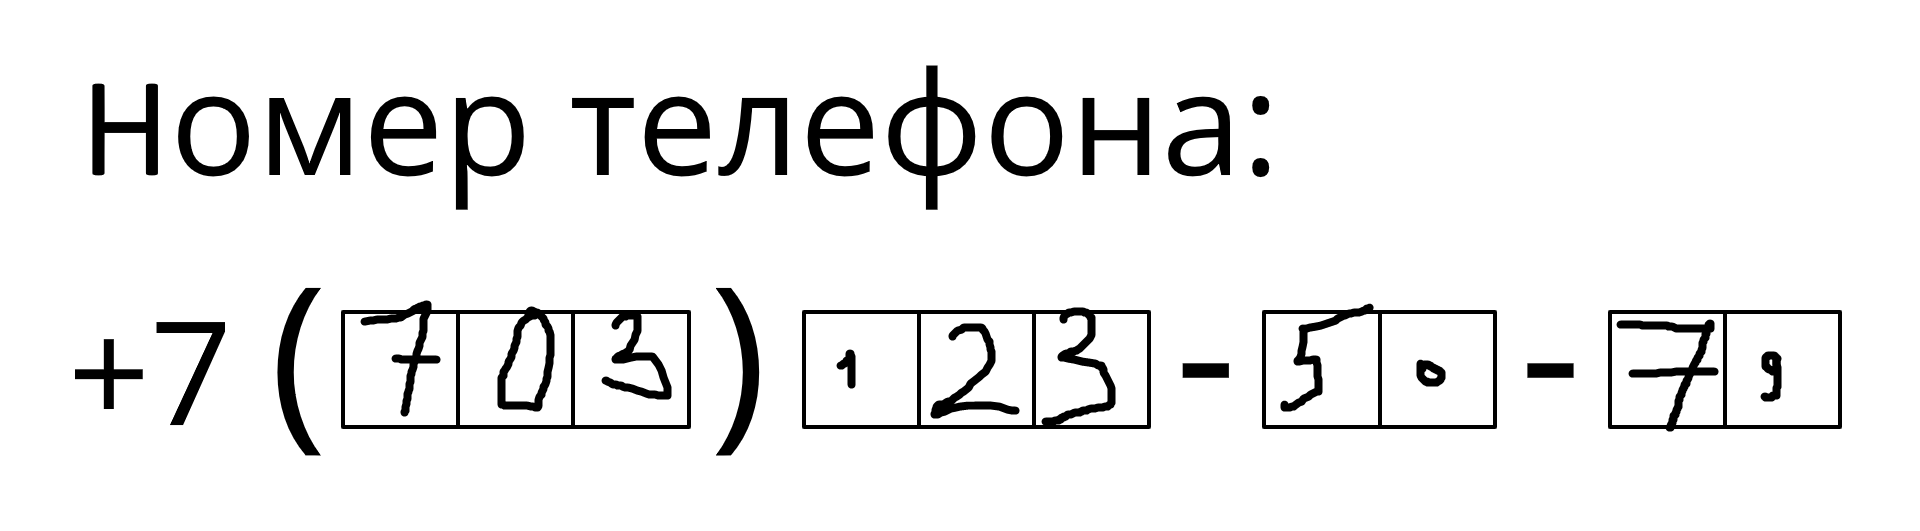

In [622]:
predictor(image(1), model_2)

In [624]:
# Model poorly datects differences between 1 and 7.

In [626]:
# To solve this problem we should add more different samples of 1 and 7 to train
# data

Recognized phone number: +7 (711) 177-71-77


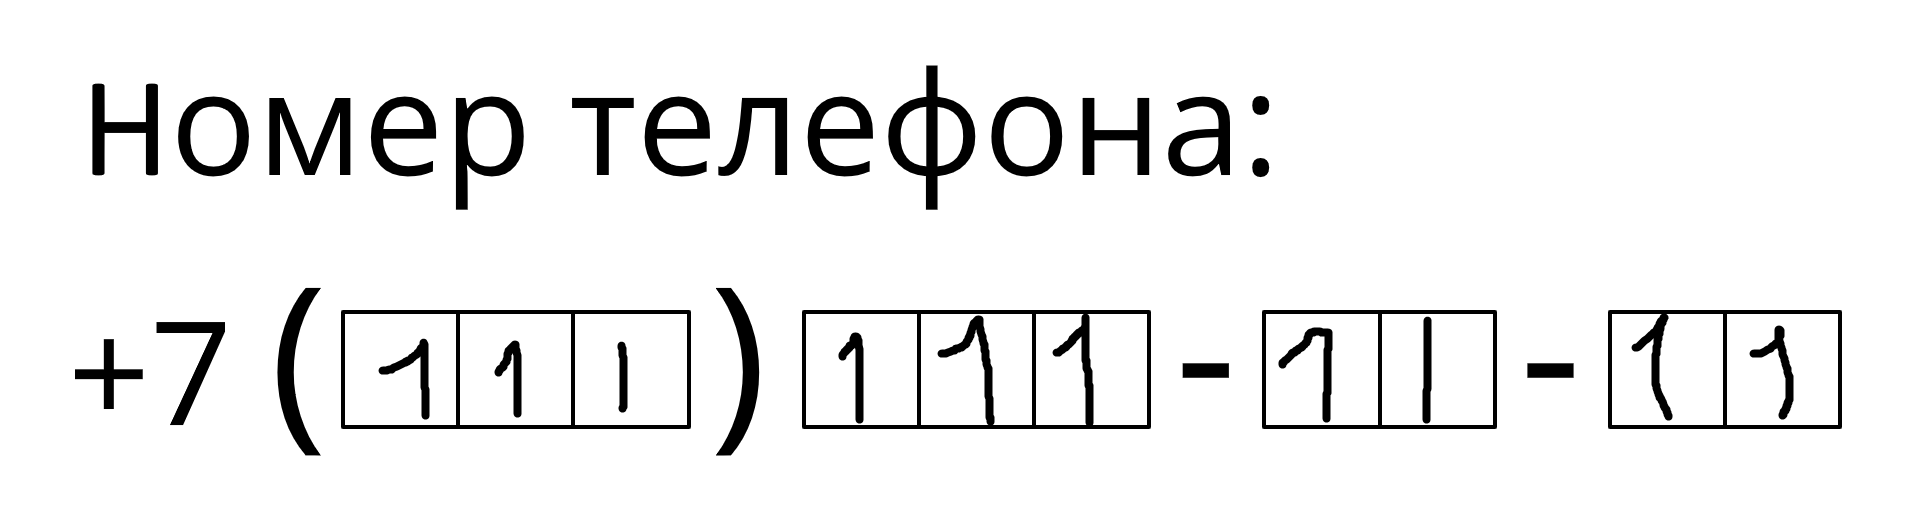

In [623]:
predictor(image(3), model_2)